# AST 384C - Computational Astrophysics - HW 1
## Carlos Jurado

In [1]:
# Python package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import timeit

# Loading in style file for plots
plt.style.use('/Users/caj3577/Desktop/plotting.mplstyle')

## Problem 1: 
Compute the integral

$$ \int_1^5 = \frac{1}{x^{3/2}} dx$$

with the three methods (Rectangle Rule, Trapezoid Rule, Simposon's Rule) and plot the error in the numerical integral against the step
size ∆x (or number of bins N) for several values of N ∈[5, 1000] for each method. Time
each calculation as well (time.timeit will work well in python). Approximately how
many steps are required to get an answer with a relative error of |I−Iexact|/Iexact < 10−3?
What about 10−5? What did you lean about the trade-off between method, accuracy and
calculation speed? (Note: you can test your implementation against the implementations in
scipy.integrate.)

In [2]:

def integrate_rectangles(func, N, a, b):
    ''' 
    Numerically integrates a function using the Rectangle method

    func - The function to integrate over 
    N - The number of rectangles to compute the total intergral with 
    a - The lower bound of integration 
    b - The upper bound of integration 
    '''
    
    suma = []
    delta_x = (b-a)/N

    for i in range(N):
        i = i + 1 #indexing stars at 0 in python
        x_i = a + (i-1)*delta_x # Computing left endpoint rectangles
        sum_i = func(x_i) * delta_x
        suma.append(sum_i)

    return sum(suma)


def integrate_trapezoids(func, N, a, b):
    ''' 
    Numerically integrates a function using the Trapezoid method

    func - The function to integrate over 
    N - The number of Trapezoid to compute the total intergral with 
    a - The lower bound of integration 
    b - The upper bound of integration 
    '''

    suma = []
    delta_x = (b-a)/N
    x_i1 = a #initialize left edge of trapezoid 


    for i in range(N):
        i = i + 1 #indexing starts at 0 in python
        x_i2 = a + (i)*delta_x
        sum_i = ( func(x_i1) + func(x_i2) )/2 * delta_x
        suma.append(sum_i)
        x_i1 = x_i2

    return sum(suma)
    
    

def integrate_simpson(func, N, a, b):
    ''' 
    Numerically integrates a function using Simpson's Rule.

    func - The function to integrate
    N - The number of subintervals (should be even for Simpson's rule)
    a - Lower bound of integration
    b - Upper bound of integration
    '''
    if N % 2 == 1:
        N += 1 

    delta_x = (b - a) / N
    odd_sums = []
    even_sums = []
    
    for i in range(1, N):
        x_i = a + i * delta_x 
        if i % 2 != 0:  # Odd indices
            odd_sums.append(func(x_i))
        else:  # Even indices 
            even_sums.append(func(x_i))

    return (delta_x)/3 * ( func(a) + 4 * np.sum(odd_sums) + 2*np.sum(even_sums) + func(b) )
        




In [3]:
def f1(x):
    return (1/x**(3/2))

N_array = np.logspace(np.log10(5), np.log10(2000), 50, dtype=int)


#Initializing empty list that will hold the value of the integral and the time of completion for the array of step sizes
value_rectangles_arr, value_trapezoids_arr, value_simpsion_arr = [], [], []
time_rectangles_arr, time_trapezoids_arr, time_simpsion_arr = [], [], []

for N in N_array:
    b, a = 1, 5

    time_rectangles = timeit.timeit(lambda: integrate_rectangles(f1, N, b, a), number=1)
    time_rectangles_arr.append(time_rectangles)
    value_rectangles = integrate_rectangles(f1, N, b, a)
    value_rectangles_arr.append(value_rectangles)

    time_trapezoids = timeit.timeit(lambda: integrate_trapezoids(f1, N, b, a), number=1)
    time_trapezoids_arr.append(time_trapezoids)
    value_trapezoids = integrate_trapezoids(f1, N, b, a)
    value_trapezoids_arr.append(value_trapezoids)

    time_simpsion = timeit.timeit(lambda: integrate_simpson(f1, N, b, a), number=1)
    time_simpsion_arr.append(time_simpsion)
    value_simpsion = integrate_simpson(f1, N, b, a)
    value_simpsion_arr.append(value_simpsion)
    


Calculating the integral analytically gives: 

$$ \int_1^5 = \frac{1}{x^{3/2}} = [2x^{-1/2}]_5^1 = 1.10557$$



In [4]:
## Calculating the relative errors
value_analytical = 2*(1)**(-1/2) - 2*(5)**(-1/2)
print(value_analytical)



err_rectangles_arr = ( np.array(value_rectangles_arr) - value_analytical)/value_analytical
err_trapezoids_arr = ( np.array(value_trapezoids_arr) - value_analytical)/value_analytical
err_simpsion_arr = np.abs(( np.array(value_simpsion_arr) - value_analytical)/value_analytical)

1.1055728090000843


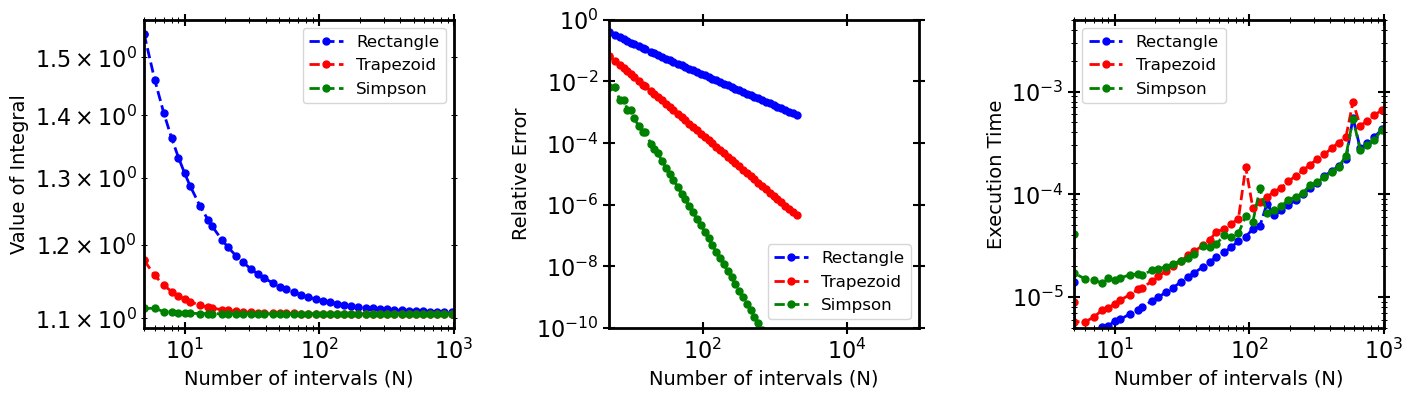

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

axs[0].loglog(N_array, value_rectangles_arr, color='b', marker='o', markersize=5, linestyle = '--', label='Rectangle')

axs[0].loglog(N_array, value_trapezoids_arr, color='r', marker='o', markersize=5, linestyle = '--', label='Trapezoid')

axs[0].loglog(N_array, value_simpsion_arr, color='g', marker='o', markersize=5, linestyle = '--', label='Simpson')


axs[0].set_xlim(5, 1000)
axs[0].set_xlabel('Number of intervals (N)')
axs[0].set_ylabel('Value of Integral')
axs[0].legend()

#############################################################################################################
#############################################################################################################
#############################################################################################################


axs[1].loglog(N_array, err_rectangles_arr, color='b', marker='o', markersize=5, linestyle = '--', label='Rectangle')

axs[1].loglog(N_array, err_trapezoids_arr, color='r', marker='o', markersize=5, linestyle = '--', label='Trapezoid')

axs[1].loglog(N_array, err_simpsion_arr, color='g', marker='o', markersize=5, linestyle = '--', label='Simpson')

axs[1].set_xlabel('Number of intervals (N)')
axs[1].set_ylabel('Relative Error')
axs[1].set_xlim(5, 10**5)
axs[1].set_ylim(10**-10, 1)
axs[1].legend()

#############################################################################################################
#############################################################################################################
#############################################################################################################


axs[2].loglog(N_array, time_rectangles_arr, color='b', marker='o', markersize=5, linestyle = '--', label='Rectangle')

axs[2].loglog(N_array, time_trapezoids_arr, color='r', marker='o', markersize=5, linestyle = '--', label='Trapezoid')

axs[2].loglog(N_array, time_simpsion_arr, color='g', marker='o', markersize=5, linestyle = '--', label='Simpson')


axs[2].set_xlabel('Number of intervals (N)')
axs[2].set_ylabel('Execution Time')
axs[2].set_xlim(5, 10**3)
axs[2].set_ylim(5 * 10**-6, 5 * 10**-3)
axs[2].legend()


In [6]:
def min_err(N_arr, err_arr, threshold):
    ''' 
    Calculates the number of steps needed for a relative error below the threshold

    N_arr: Array of step sizes
    err_arr: Array of relative errors at every step size 
    threshold: The precison at which the relative error is below

    '''
    for N, err in zip(err_arr, N_arr):
        if err < threshold: 
            
            return N
    else:
        print(f'Relative error is not below {threshold}')


rect_1e3 = min_err(err_rectangles_arr, N_array, 10**(-3))
trap_1e3 = min_err(err_trapezoids_arr, N_array, 10**(-3))
simp_1e3 = min_err(err_simpsion_arr, N_array, 10**(-3))



#redoing for the rectangles with less sampling 
N_array_extended = np.logspace(np.log10(5), np.log10(200000), 100, dtype=int)

value_rectangles_arr  = []
for N in N_array_extended:
    b, a = 1, 5
    value_rectangles_arr.append(integrate_rectangles(f1, N, b, a))
err_rectangles_arr = ( np.array(value_rectangles_arr) - value_analytical)/value_analytical



rect_1e5 = min_err(err_rectangles_arr, N_array_extended, 10**(-5))
trap_1e5 = min_err(err_trapezoids_arr, N_array, 10**(-5))
simp_1e5 = min_err(err_simpsion_arr, N_array, 10**(-5))


In [7]:
print(f'Rectangle Method: {rect_1e3} steps are needed for a precision of 10^-3.')
print(f'Trapezoid Method: {trap_1e3} steps are needed for a precision of 10^-3. ')
print(f'Simpson Method: {simp_1e3} steps are needed for a precision of 10^-3. \n')

print('=======================================================================')

print(f'\nRectangle Method: {rect_1e5} steps are needed for a precision of 10^-5. ')
print(f'Trapezoid Method: {trap_1e5} steps are needed for a precision of 10^-5. ')
print(f'Simpson Method: {simp_1e5} steps are needed for a precision of 10^-5. ')

Rectangle Method: 1769 steps are needed for a precision of 10^-3.
Trapezoid Method: 45 steps are needed for a precision of 10^-3. 
Simpson Method: 11 steps are needed for a precision of 10^-3. 


Rectangle Method: 179698 steps are needed for a precision of 10^-5. 
Trapezoid Method: 461 steps are needed for a precision of 10^-5. 
Simpson Method: 35 steps are needed for a precision of 10^-5. 


What did you lean about the trade-off between method, accuracy and
calculation speed?

The least complex method to code is the rectangle method followed by the trapezoid and simpson's method. The calculation speed and precision increase proportionally as the code complexity of the method increases. So Simpson's method was the most difficult to code, tended towards high precison quickly, and longer calculation times as the number of steps increased. On the other hand, the rectangle method was the most straight-forward to implement but took a large number of steps and time to converge on the analytical value. 